In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Data taken from this [side](http://www.cboe.com/products/vix-index-volatility/vix-options-and-futures/vix-index/vix-historical-data) -- click on [VIX data for 2004 to present here.](http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv)

The CBOE Volatility Index, known by its ticker symbol VIX, is a popular measure of the stock market's expectation of volatility implied by S&P 500 index options, calculated and published by the Chicago Board Options Exchange

In [2]:
df = pd.read_csv('vixcurrent.csv')

In [3]:
df.head(5)

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


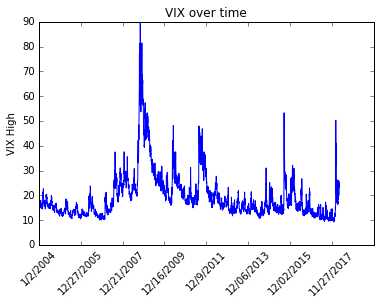

In [34]:
fig, ax = plt.subplots()
ax.plot(df['VIX High'])
ax.set_ylabel('VIX High');
ax.set_title('VIX over time')
labels = ax.get_xticks().tolist()
new_labels = [df['Date'][int(label)] for label in labels[:-1]]
ax.set_xticklabels(new_labels + [''], rotation=45);

#### Center data at zero

In [122]:
df_all = pd.read_csv('vixcurrent.csv')

In [123]:
training_start = 200
training_end = 1000
df = df_all[training_start:training_end]
#df = df_all[2500:3000]
training_data = df['VIX High'].values - df_all['VIX High'].min()

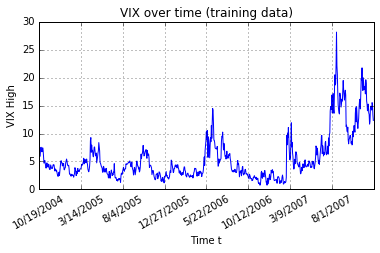

In [124]:
fig, ax = plt.subplots()
ax.plot(training_data)
ax.set_ylabel('VIX High');
ax.set_xlabel('Time t')
ax.set_title('VIX over time (training data)')
labels = ax.get_xticks().tolist()
new_labels = [df['Date'][int(label) + training_start] for label in labels[:-1]]
ax.set_xticklabels(new_labels + [''], rotation=30);
ax.grid(True)
fig.set_size_inches(6, 3)
np.savetxt("training_data.csv", training_data)

In [125]:
test_end = training_end + 200
df = df_all[training_end:test_end]
#df = df_all[2500:3000]
test_data = df['VIX High'].values - df_all['VIX High'].min()

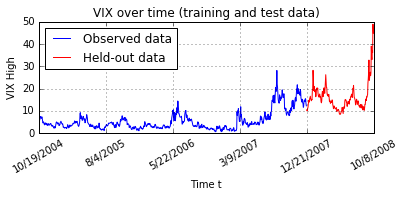

In [141]:
fig, ax = plt.subplots()
t_training = range(training_data.shape[0])
t_test = range(training_data.shape[0], test_data.shape[0]+training_data.shape[0])
ax.plot(t_training, training_data, color='blue', label='Observed data')
ax.plot(t_test, test_data, color='red', label='Held-out data')
ax.set_ylabel('VIX High');
ax.set_xlabel('Time t')
ax.set_title('VIX over time (training and test data)')
labels = ax.get_xticks().tolist()
new_labels = [df_all['Date'][int(label) + training_start] for label in labels]
ax.set_xticklabels(new_labels + [''], rotation=30);
ax.grid(True)
ax.legend(loc='upper left')
fig.set_size_inches(6, 2)

np.savetxt("training_data.csv", training_data)
np.savetxt("test_data.csv", test_data)